In [27]:
import pandas as pd
df = pd.read_csv("/content/spam.csv",encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [30]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
df.isnull().sum()

,0
label,0
text,0


In [32]:
df.tail(10)

,label,text
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [33]:
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)
df['cleaned_text'] = df['text'].apply(clean_text)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label_num'], test_size=0.2, random_state=42)


In [36]:
df

,label,text,cleaned_text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å 750 pound prize...,1
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,0
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,0


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score



In [39]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[965,   0],
       [ 33, 117]])

In [54]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9704035874439462


In [57]:
full_vectors = vectorizer.transform(df['cleaned_text'])
df['Prediction'] = model.predict(full_vectors)
df['Prediction'] = df['Prediction'].map({1: 'Spam', 0: 'Not Spam'})

In [58]:
print("\n Sample Predictions:")
print(df[['text', 'Prediction']].head(10))


 Sample Predictions:
                                                text Prediction
0  Go until jurong point, crazy.. Available only ...   Not Spam
1                      Ok lar... Joking wif u oni...   Not Spam
2  Free entry in 2 a wkly comp to win FA Cup fina...       Spam
3  U dun say so early hor... U c already then say...   Not Spam
4  Nah I don't think he goes to usf, he lives aro...   Not Spam
5  FreeMsg Hey there darling it's been 3 week's n...   Not Spam
6  Even my brother is not like to speak with me. ...   Not Spam
7  As per your request 'Melle Melle (Oru Minnamin...   Not Spam
8  WINNER!! As a valued network customer you have...       Spam
9  Had your mobile 11 months or more? U R entitle...       Spam


In [60]:
df[['text', 'Prediction']].to_csv("predicted_spam_results.csv", index=False)
df

,label,text,cleaned_text,label_num,Prediction
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0,Not Spam
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0,Not Spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1,Spam
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0,Not Spam
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,0,Not Spam
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å 750 pound prize...,1,Spam
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home,0,Not Spam
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,0,Not Spam
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,0,Not Spam


<ipython-input-62-105a56e8972d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


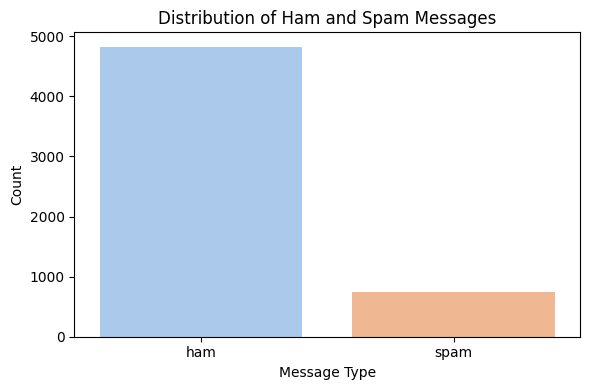

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title("Distribution of Ham and Spam Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

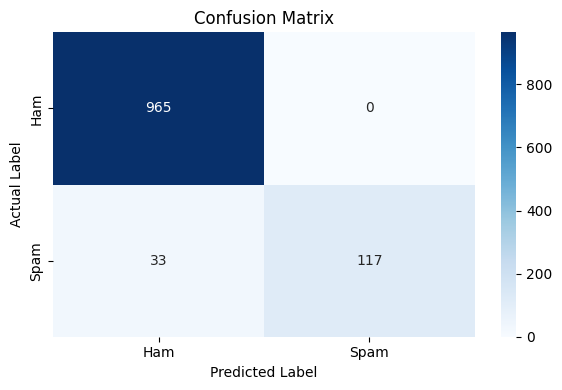

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

In [64]:
def predict_message(msg):
    cleaned = clean_text(msg)
    vector = vectorizer.transform([cleaned])
    result = model.predict(vector)[0]
    return "Spam" if result == 1 else "Not Spam"

In [67]:
print("\n Message Check:")
print("1:", predict_message("Congratulations! You've won a free vacation. Call now!"))
print("2:", predict_message("Hi, how are you?"))


 Message Check:
1: Spam
2: Not Spam
